## Regression between atmospheric contribution to SLH and AMV using observational data

In this notebook a regression is performed between the atmospheric contribution to sea level rise at the Dutch coast as has been calculated using three different regression models (Nearest point, Timmerman and Dangendorf). These models show a contribution to sea level rise at the Dutch coast which is varying over time. The aim of regressing this to the AMV is to understand the relation between the varying contribution of wind to sea level rise and the AMV.


As a low pass filter, to both datasets the LOWESS method is applied. 




In [5]:
import matplotlib.pyplot as plt
import matplotlib

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/AMV/code')

import import_data as imprt
import regression as regr
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import and plot wind contribution to sea level data

The annual data has been detrended

In [8]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()


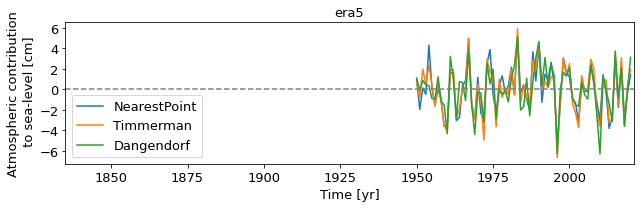

In [9]:
fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')


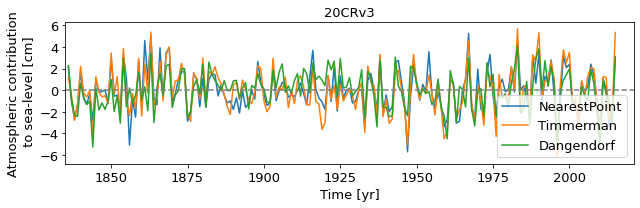

In [10]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



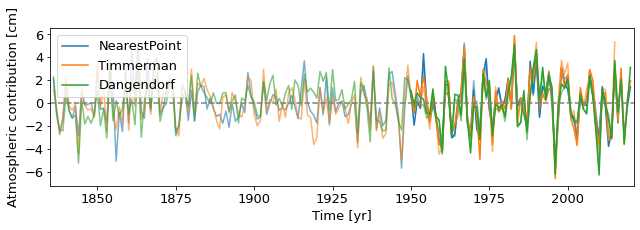

In [11]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)

### Import and plot AMV data

There are three observational SST products: HadiSST, COBE and ERSST
whereof the deseasonalized, detrended data is imported

In [13]:
AMV_data = imprt.import_obs_AMV_data()

In [14]:
AMV_data

,HadISSTv2,ERSSTv5,COBE-SST2
time,,,
1870,-0.064876,0.135647,-0.022205
1871,-0.090710,0.052964,-0.095801
1872,-0.120943,-0.068072,-0.156010
1873,-0.197644,-0.010218,-0.179611
1874,-0.190010,0.059488,-0.152831
...,...,...,...
2014,-0.133286,-0.131023,-0.137060
2015,-0.127954,-0.094863,-0.153978
2016,-0.002434,0.068500,0.020099


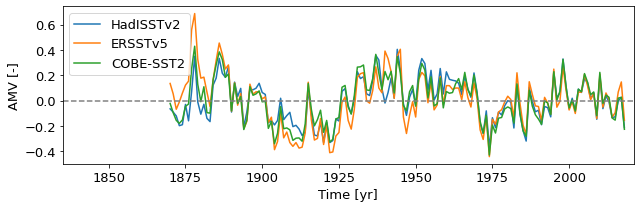

In [15]:
fig.plot_df_timeseries(AMV_data, ylabel = 'AMV [-]', title = '')



### Perform regression for 21y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 21 y window

In [16]:
df_era5_21, df_20cr_21 = imprt.import_obs_ac_slh_data(smoothed = True)
AMV_data_21 = imprt.import_obs_AMV_data(smoothed = True)

In [17]:
df_era5_21

,NearestPoint,Timmerman,Dangendorf
time,,,
1950,0.149723,0.809307,0.441204
1951,0.040338,0.649468,0.345215
1952,-0.067243,0.493125,0.254877
1953,-0.171338,0.342751,0.170639
1954,-0.269642,0.200348,0.092530
...,...,...,...
2016,-0.354231,-0.094597,0.202814
2017,-0.322064,-0.036732,0.290220
2018,-0.283941,0.028512,0.381756


#### Plot regression input

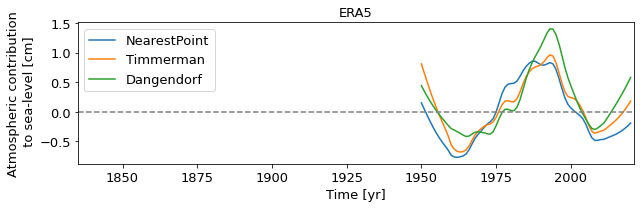

In [18]:
fig.plot_df_timeseries(df_era5_21, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5')


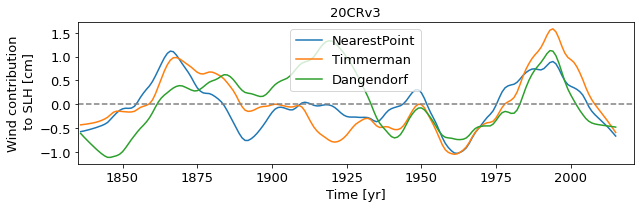

In [19]:
fig.plot_df_timeseries(df_20cr_21, ylabel = 'Wind contribution\n to SLH [cm]', title = '20CRv3')



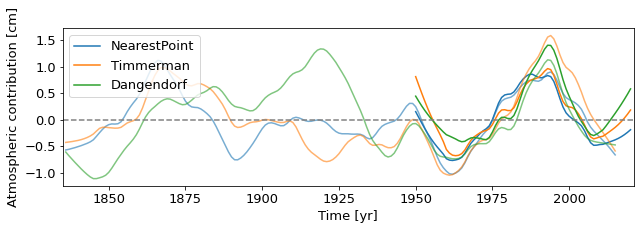

In [20]:
fig.plot_era5_20cr_timeseries(df_era5_21, df_20cr_21)

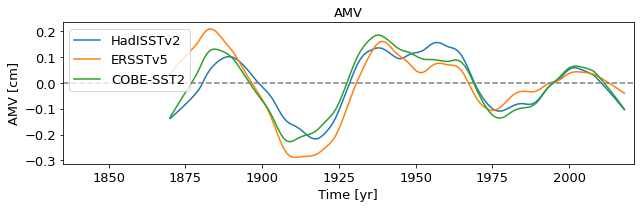

In [21]:
fig.plot_df_timeseries(AMV_data_21, ylabel = 'AMV [cm]', title = 'AMV')



#### Perform regression

In [22]:
results_era5_21, timeseries_era5_21 = regr.lagged_regression(AMV_data_21, df_era5_21)
results_20cr_21, timeseries_20cr_21 = regr.lagged_regression(AMV_data_21, df_20cr_21)

#### Show regression results

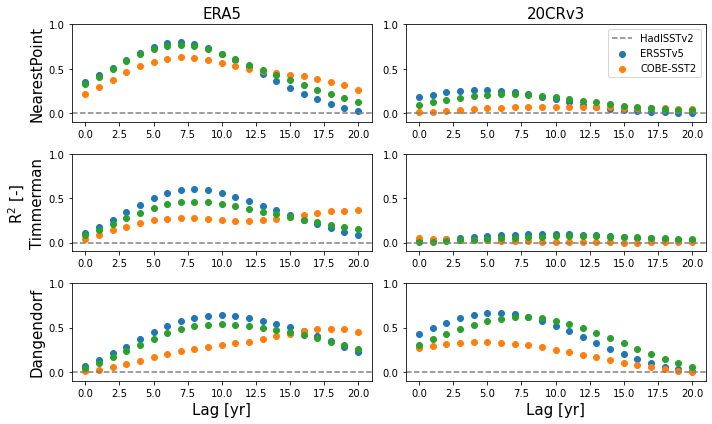

In [23]:
fig.plot_result(results_era5_21, results_20cr_21, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

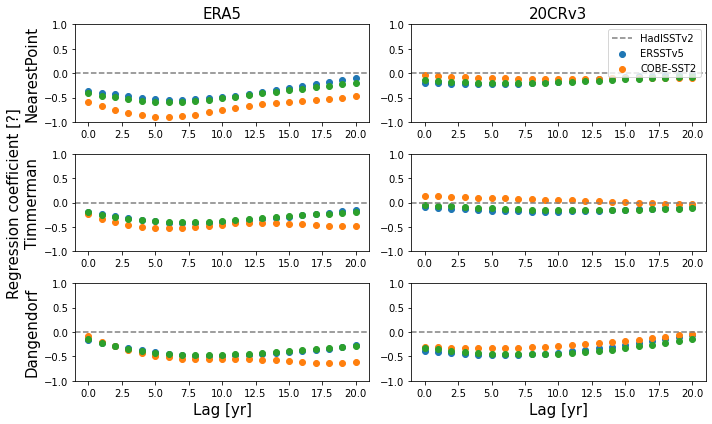

In [24]:
fig.plot_result(results_era5_21, results_20cr_21, 'coef', 'Regression coefficient [?]', ymin = -1, ymax = 1)

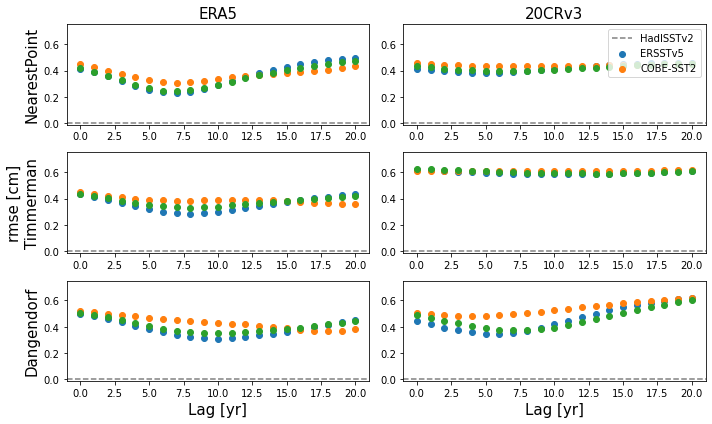

In [25]:
fig.plot_result(results_era5_21, results_20cr_21, 'rmse', 'rmse [cm]', ymin = -0.01, ymax = 0.75)

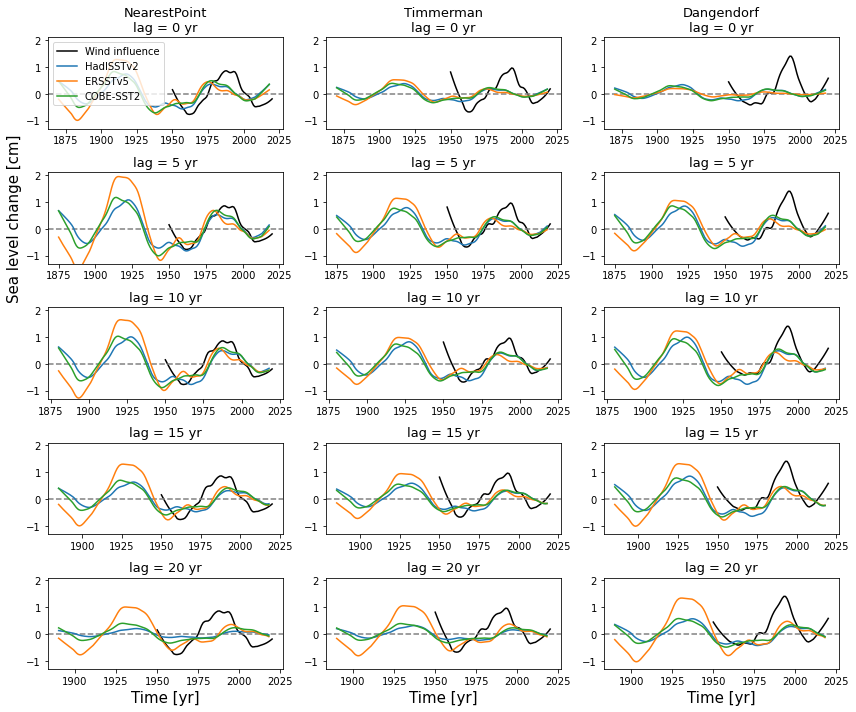

In [26]:
fig.plot_timeseries(timeseries_era5_21, df_era5_21, [0, 5, 10, 15, 20], data_type='era5', ymin= -1.3, ymax = 2.1)

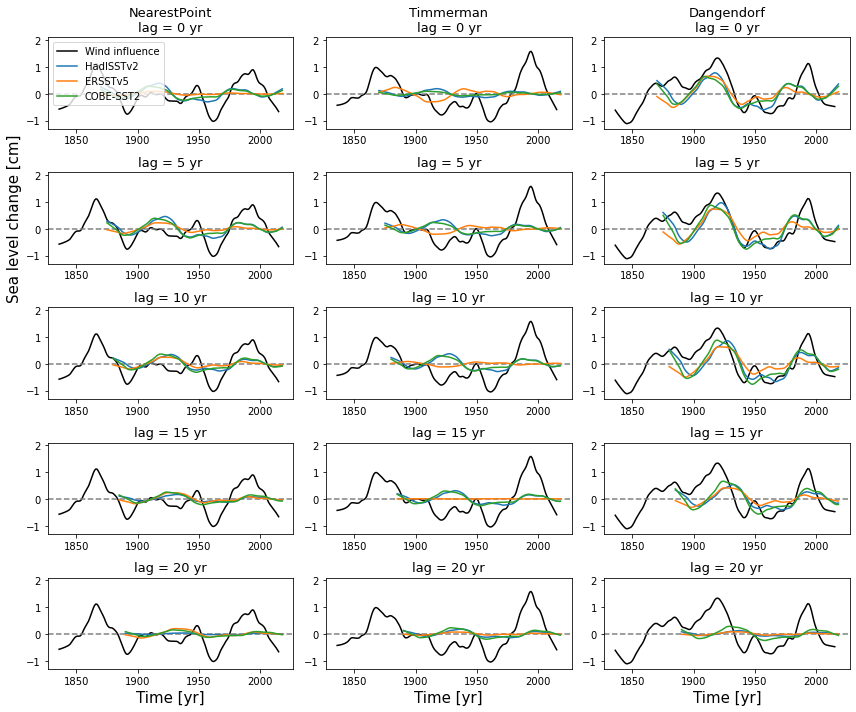

In [27]:
fig.plot_timeseries(timeseries_20cr_21, df_20cr_21, [0, 5, 10, 15, 20], data_type='20cr', ymin= -1.3, ymax = 2.1)

#### Create barplot of preferred lags

In [ ]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_21[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_21[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [ ]:
lag_df.T

In [ ]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[1,12,3,2]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,16)
plt.title('Window = 21 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_21', 
                bbox_inches = 'tight', dpi = 500)

### Perform regression for 31y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 31 y window

In [ ]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True, window = 31)
AMV_data_31 = imprt.import_obs_AMV_data(smoothed = True, window = 31)

#### Plot regression input

In [ ]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 31)


In [ ]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 31)



In [ ]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31, window = 31)

In [ ]:
fig.plot_df_timeseries(AMV_data_31, ylabel = 'AMV [-]', title = '', window = 31)



In [ ]:
AMV_data_31

#### Perform regression

In [ ]:
results_era5_31, timeseries_era5_31 = regr.lagged_regression(AMV_data_31, df_era5_31)
results_20cr_31, timeseries_20cr_31 = regr.lagged_regression(AMV_data_31, df_20cr_31)

In [ ]:
results_20cr_31.swaplevel(0,2, axis=1)[0]

In [ ]:
results_20cr_31.swaplevel(0,2, axis=1)[4, 'Dangendorf']

#### Show regression results

In [ ]:
fig.plot_result(results_era5_31, results_20cr_31, 'r$^2$', 'R$^2$ [-]', ymin = 0.0, ymax = 1.0, window = 31)

In [ ]:
fig.plot_result(results_era5_31, results_20cr_31, 'coef', 'Regression coefficient [-]', ymin = -1, ymax = 0.3, window = 31, location = 'lower right')

In [ ]:
fig.plot_result(results_era5_31, results_20cr_31, 'rmse', 'RMSE [cm]', ymin = -0.1, ymax = 0.7, window = 31)

In [ ]:
fig.plot_timeseries(timeseries_era5_31, df_era5_31, [0, 5, 10, 15], data_type='era5', window = 31)

In [ ]:
fig.plot_timeseries(timeseries_20cr_31, df_20cr_31, [0, 5, 10, 15], data_type='20cr', window = 31)

In [ ]:
def plot_timeseries2(timeseries, data, lags, data_type, window = 21, ymin = -1.1, ymax = 2.1):
    
    
    n_row = len(lags)
    n_col = 1
    fsize = 15
    
    AMV_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']
    
    fig, axs = plt.subplots(n_row, n_col, figsize = (9,2*n_row))
    
    
    for i in range(n_row):
            
            
        ax = axs[i]
        ax.set_ylim(ymin,ymax)
        ax.plot(data.index, data['Dangendorf'].values, color = 'gray', label = 'Wind-driven sea\n level variability')
        ax.axhline(color='grey', linestyle='--')  
            
        for name in AMV_names:
            ts = timeseries[name, lags[i]]
            ax.plot(ts.index, ts.values, label = name)
                
        if i == 1:        
            ax.set_ylabel('AMV contribution [cm]', fontsize=fsize)
        if i ==0:
            ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize = fsize)
                
        if i == 0:
            ax.set_title(f'Dangendorf\n lag = {lags[i]} yr', fontsize=fsize) 
        else:
            ax.set_title(f'lag = {lags[i]} yr', fontsize=fsize) 
                
        if i == n_row-1:
            ax.set_xlabel('Time [yr]', fontsize=fsize)
    plt.tight_layout()
    
    
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/timeseries_{data_type}_window{window}_dang', dpi = 500)
    

In [ ]:
plot_timeseries2(timeseries_20cr_31.swaplevel(0,1, axis=1)['Dangendorf'], df_20cr_31, [0, 5, 10, 15], data_type='20cr', window = 31, ymin = -1.1, ymax = 2.1)

In [ ]:
df_20cr_31

#### Create barplot of preferred lags

In [ ]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [ ]:
lag_df.T

In [ ]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[1,11,5,1]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,16)
plt.title('Window = 31 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_31', 
                bbox_inches = 'tight', dpi = 500)

### Perform regression for 11y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 11 y window

In [ ]:
df_era5_11, df_20cr_11 = imprt.import_obs_ac_slh_data(smoothed = True, window = 11)
AMV_data_11 = imprt.import_obs_AMV_data(smoothed = True, window = 11)

#### Plot regression input

In [ ]:
fig.plot_df_timeseries(df_era5_11, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 11)


In [ ]:
fig.plot_df_timeseries(df_20cr_11, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 11)



In [ ]:
fig.plot_era5_20cr_timeseries(df_era5_11, df_20cr_11, window = 11)

In [ ]:
fig.plot_df_timeseries(AMV_data_11, ylabel = 'AMV [cm]', title = 'AMV', window = 11)



#### Perform regression

In [ ]:
results_era5_11, timeseries_era5_11 = regr.lagged_regression(AMV_data_11, df_era5_11)
results_20cr_11, timeseries_20cr_11 = regr.lagged_regression(AMV_data_11, df_20cr_11)

#### Show regression results

In [ ]:
fig.plot_result(results_era5_11, results_20cr_11, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 11)

In [ ]:
fig.plot_result(results_era5_11, results_20cr_11, 'coef', 'Regression coefficient [?]', ymin = -1.1, ymax = 1, window = 11)

In [ ]:
fig.plot_result(results_era5_11, results_20cr_11, 'rmse', 'rmse [cm]', ymin = -0.1, ymax = 1, window = 11)

#### Create barplot of preferred lags

In [ ]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_11[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_11[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [ ]:
lag_df.T

In [ ]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[2,15,0,1]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.ylim(0,16)
plt.yticks(size = 15)
plt.title('Window = 11 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_11', 
                bbox_inches = 'tight', dpi = 500)

In [ ]:
fig.plot_timeseries(timeseries_era5_11, df_era5_11, [0, 5, 10, 15], data_type='era5', window = 11, ymin= -1.5, ymax = 2.2)

In [ ]:
fig.plot_timeseries(timeseries_20cr_11, df_20cr_11, [0, 5, 10, 15], data_type='20cr', window = 11, ymin= -1.5, ymax = 2.2)

### Perform regression for 41y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 41 y window

In [ ]:
df_era5_41, df_20cr_41 = imprt.import_obs_ac_slh_data(smoothed = True, window = 41)
AMV_data_41 = imprt.import_obs_AMV_data(smoothed = True, window = 41)

#### Plot regression input

In [ ]:
fig.plot_df_timeseries(df_era5_41, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 41)


In [ ]:
fig.plot_df_timeseries(df_20cr_41, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 41)



In [ ]:
fig.plot_era5_20cr_timeseries(df_era5_41, df_20cr_41, window = 41)

In [ ]:
fig.plot_df_timeseries(AMV_data_41, ylabel = 'AMV [cm]', title = 'AMV', window = 41)



#### Perform regression

In [ ]:
results_era5_41, timeseries_era5_41 = regr.lagged_regression(AMV_data_41, df_era5_41)
results_20cr_41, timeseries_20cr_41 = regr.lagged_regression(AMV_data_41, df_20cr_41)

#### Show regression results

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'r$^2$', 'R$^2$ [-]', ymin=-0.1, ymax = 1.0, window = 41)

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'coef', 'Regression coefficient', ymin = -1, ymax = 0.7, window = 41)

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'rmse', 'rmse [cm]', ymin = -0.1, ymax = 0.7, window = 41)

In [ ]:
fig.plot_timeseries(timeseries_era5_41, df_era5_41, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='era5', window = 41, ymin= -1.1, ymax = 2)

In [ ]:
fig.plot_timeseries(timeseries_20cr_41, df_20cr_41, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='20cr', window = 41, ymin= -1.1, ymax = 2)